In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import pandas as pd
plt.style.use([hep.style.ROOT, hep.style.firamath])

In [39]:
df = pd.read_csv(f'../data_files/7.0.2/test.csv', index_col=[0])
model = tf.keras.models.load_model('../neural_network/models/v7.0.2')

In [40]:
predictions = model.predict(df.drop(['Lb_M', 'IsSimulated', 'category'], axis=1)).flatten()

In [44]:
df['pred'] = predictions

In [51]:
df['class'] = np.where(df['pred']>0.5,1,0)

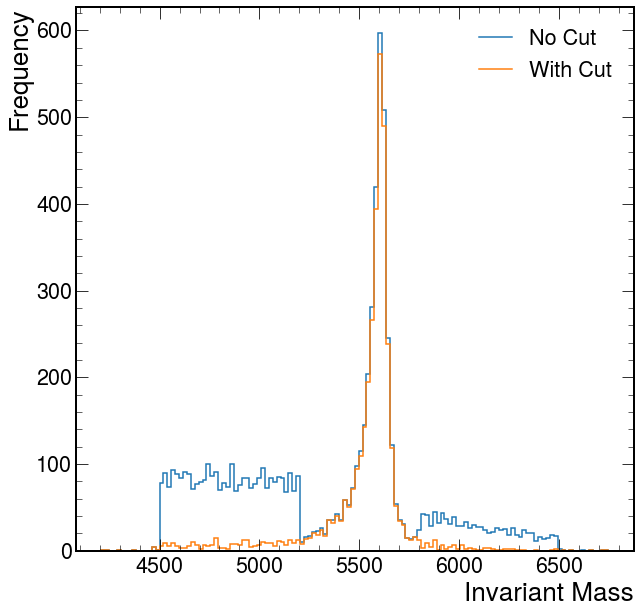

In [52]:
h, bins = np.histogram(df['Lb_M'], bins=130)

cut_df = df[df['class'] == 1]
h2, _ = np.histogram(cut_df['Lb_M'], bins=bins)

fig, ax = plt.subplots(1, 1)
hep.histplot([h, h2], bins, ax=ax, label=['No Cut', 'With Cut'])
plt.ylabel('Frequency')
plt.xlabel('Invariant Mass')
plt.legend()
plt.show()